### Business challenge and objectives

We are working for an e-commerce company and will use past transactional data to detect potential fraud.

Our dataset is slightly unusual.
We have 284807 transactions and 31 different columns
- We have 29 unknown columns and numeric values.

This is appropriate in this business environment because 
customers and their information should ideally remain anonymous.
One column denotes how many times the customer has purchased goods on our platform.
- One column denotes how much money the user has spent on our platform in total.

- The response variate denotes whether the transaction is fraudulent.

Using classification models and deep learning techniques, we wish to be able to predict, using our given features, whether any given transaction is legitimate or fraudulent.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [17]:
dataset = pd.read_csv("P39-Credit-Card-Fraud/Dataset/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory data analysis

In [19]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
dataset.isna().any() # Checking for any na values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset["normalizedAmount"] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(columns = "Amount", axis = 1)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [22]:
# For now, we drop the "time" column
dataset = dataset.drop(columns = "Time", axis = 1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [23]:
X = dataset.drop(columns = "Class")
y = dataset["Class"]

### Model Preparation

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
# Balancing the training set
y_train.value_counts() # no balance at all as it is

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) >= len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

import random

random.seed(2)
higher = np.random.choice(a = higher, size = len(lower))
lower = np.asarray(lower)
new_indices = np.concatenate((lower, higher))

X_train = X_train.loc[new_indices, ]
y_train = y_train[new_indices]

### Building our model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [27]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dropout(0.4),
    Dense(units = 20, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dense(units = 1, activation='sigmoid'),
])
model.compile(optimizer = "adam", loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [28]:
model.fit(x = X_train,
         y = y_train,
         batch_size = 4,
         epochs = 30)

Epoch 1/30
186/186 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8253
Epoch 2/30
186/186 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9355
Epoch 3/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9409
Epoch 4/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9449
Epoch 5/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9489
Epoch 6/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9543
Epoch 7/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9570
Epoch 8/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9570
Epoch 9/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9597
Epoch 10/30
186/186 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9597

### Model Evaluation

In [29]:
evaluation = model.evaluate(x = X_test, y = y_test)
print("Test accuracy: {: .3f}".format(evaluation[1]))

2226/2226 [==============================] - 3s 2ms/step - loss: 0.3575 - accuracy: 0.9348
Test accuracy:  0.935


In [30]:
y_pred = model.predict_classes(x = X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     71082
           1       0.02      0.92      0.05       120

    accuracy                           0.93     71202
   macro avg       0.51      0.93      0.51     71202
weighted avg       1.00      0.93      0.96     71202



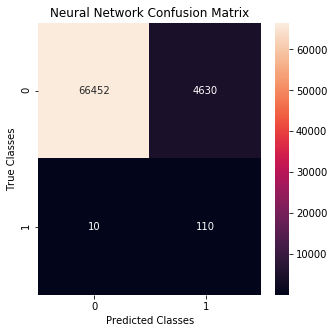

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm, annot = True, fmt = "g", ax = axes)
axes.set_title('Neural Network Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_true = y_test, y_pred = y_pred))

### Using Random Forest Classification

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.90      0.11       120

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202



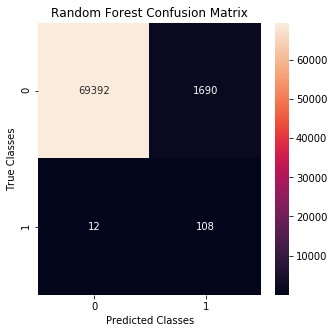

In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())
y_pred_random_forest = random_forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_title('Random Forest Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_test, y_pred_random_forest))

In [33]:
print(classification_report(y_true = y_test, y_pred = y_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.90      0.11       120

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202



### Using Decision Tree Classification

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71082
           1       0.02      0.91      0.03       120

    accuracy                           0.91     71202
   macro avg       0.51      0.91      0.49     71202
weighted avg       1.00      0.91      0.95     71202



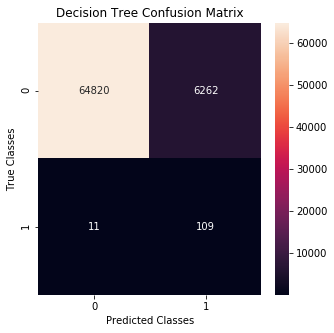

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X = X_train, y = y_train)
y_pred_decision_tree = decision_tree.predict(X = X_test)
cm_dt = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm_dt, annot = True, fmt = "g", ax = axes)
axes.set_title('Decision Tree Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_test, y_pred_decision_tree))

### Improving our models

### SMOTE Sampling

Synthetic Minority Oversampling Technique:
- A random example from minority class is chosen.

- k of its nearest neighbors are found (typically k = 5)

- A randomly selected neighbor is chosen, and a synthetic example is created at a randomly selected point between the two examples in the feature space.

Caveat:
- If there is alot of overlap between the classes, we risk creating synthetic examples that are ambiguous

### Undersampling vs. Oversampling

Undersampling:
- Deleting or merging examples in the majority class

Oversampling:
- Duplicate or create new synthetic examples in the minority class.

In [35]:
fraud_indices = np.array(dataset[dataset.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [36]:
normal_indices = dataset[dataset == 0].index

In [37]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [38]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [39]:
under_sample_data = dataset.iloc[under_sample_indices, :]

In [40]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"].values
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == "Class"].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

In [42]:
model.fit(x = X_train,
         y = y_train,
         batch_size = 4,
         epochs = 30)

Epoch 1/30
172/172 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9549
Epoch 2/30
172/172 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9666
Epoch 3/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9680
Epoch 4/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9709
Epoch 5/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9797
Epoch 6/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9826
Epoch 7/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9840
Epoch 8/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9782
Epoch 9/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9898
Epoch 10/30
172/172 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9869

In [43]:
evaluation = model.evaluate(x = X_test, y = y_test)
print("Test accuracy: {: .3f}".format(evaluation[1]))

10/10 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.9561
Test accuracy:  0.956


In [44]:
y_pred_random_forest = random_forest.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.99      0.98      0.99       147

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



In [45]:
y_pred_decision_tree = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       149
           1       0.91      0.98      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



In [46]:
# Using SMOTE oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:
model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 10)

Epoch 1/10
6220/6220 [==============================] - 13s 2ms/step - loss: 0.0473 - accuracy: 0.9845
Epoch 2/10
6220/6220 [==============================] - 13s 2ms/step - loss: 0.0202 - accuracy: 0.9941
Epoch 3/10
6220/6220 [==============================] - 13s 2ms/step - loss: 0.0146 - accuracy: 0.9959
Epoch 4/10
6220/6220 [==============================] - 17s 3ms/step - loss: 0.0119 - accuracy: 0.9968 0s - loss: 0
Epoch 5/10
6220/6220 [==============================] - 14s 2ms/step - loss: 0.0109 - accuracy: 0.9971
Epoch 6/10
6220/6220 [==============================] - 15s 2ms/step - loss: 0.0099 - accuracy: 0.9974
Epoch 7/10
6220/6220 [==============================] - 14s 2ms/step - loss: 0.0091 - accuracy: 0.9976
Epoch 8/10
6220/6220 [==============================] - 14s 2ms/step - loss: 0.0087 - accuracy: 0.9979
Epoch 9/10
6220/6220 [==============================] - 13s 2ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 10/10
6220/6220 [==============================] - 14s

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



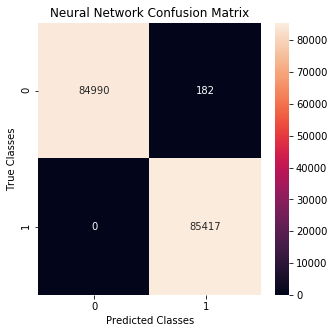

In [53]:
y_pred = model.predict_classes(x = X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm, annot = True, fmt = "g", ax = axes)
axes.set_title('Neural Network Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     85172
           1       0.91      0.93      0.92     85417

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589



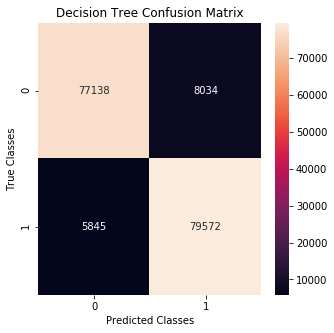

In [58]:
y_pred_decision_tree = decision_tree.predict(X = X_test)
cm_dt = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm_dt, annot = True, fmt = "g", ax = axes)
axes.set_title('Decision Tree Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85172
           1       0.97      0.92      0.95     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



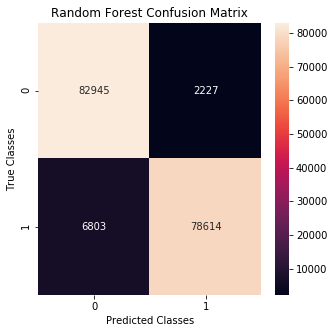

In [59]:
y_pred_random_forest = random_forest.predict(X = X_test)
cm_rf = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize = (5, 5))
axes = plt.axes()
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_title('Random Forest Confusion Matrix')
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
print(classification_report(y_test, y_pred_random_forest))